In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [7]:
digits.target[122]

8

In [9]:
digits.data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

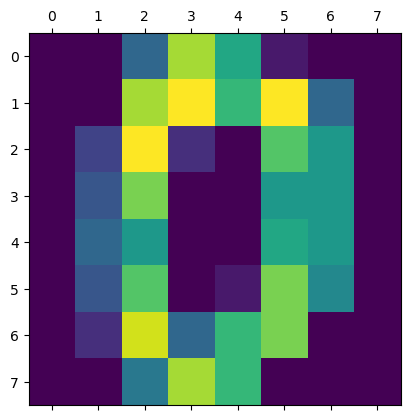

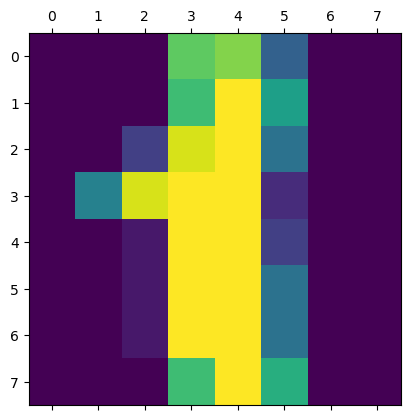

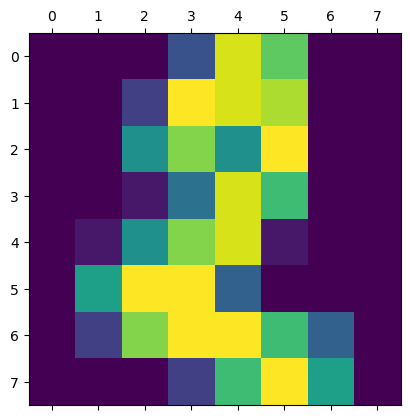

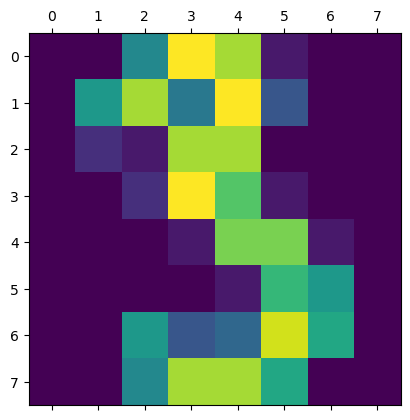

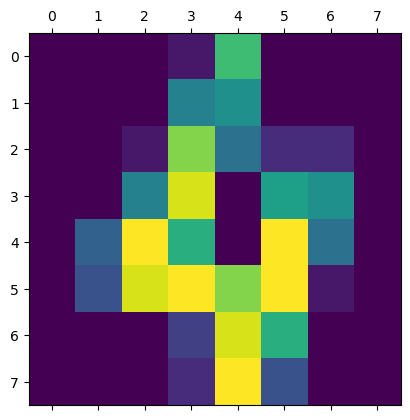

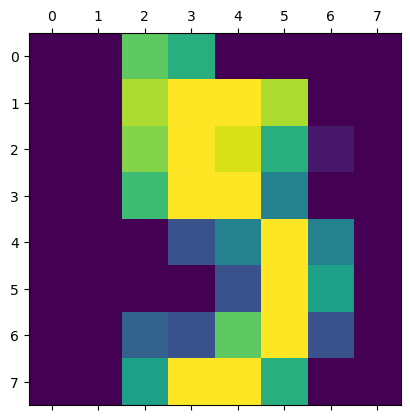

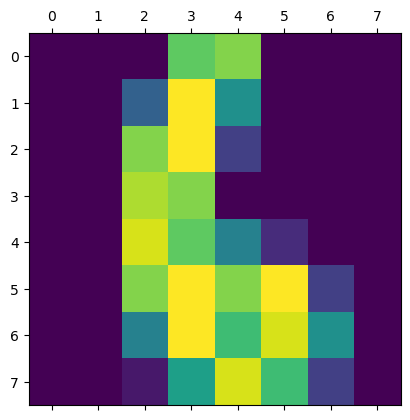

In [11]:
for i in range(7):
    plt.matshow(digits.images[i])

In [12]:
digits.target[1]

1

In [15]:
from sklearn .model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size= 0.1)

In [19]:
len(X_train)

1617

In [21]:
from sklearn import linear_model

In [23]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
reg.predict([X_test[1]])

array([3])

In [27]:
X_test[9]

array([ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15.,
       16.,  1.,  0.,  0.,  2., 14.,  0., 10., 12.,  4.,  0.,  0.,  5.,
       13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,  0., 12.,  4.,
        0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5.,
        0., 16.,  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.])

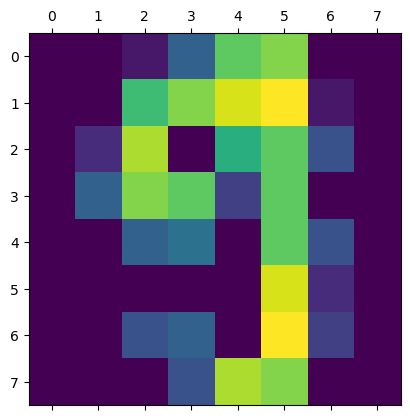

In [29]:
plt.matshow(X_test[9].reshape(8,8))

In [31]:
reg.predict(digits.data[0:9])

array([0, 1, 2, 3, 4, 9, 6, 7, 8])

In [33]:
reg.predict([X_test[9]])

array([9])

In [35]:
reg.score(X_test, Y_test)

0.9777777777777777

In [37]:
Y_test[9]

9

In [39]:
from sklearn.metrics import confusion_matrix 

In [41]:
Y_predicted = reg.predict(X_test)
C = confusion_matrix(Y_test, Y_predicted)
C

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 18]])

Text(95.72222222222221, 0.5, 'Truth')

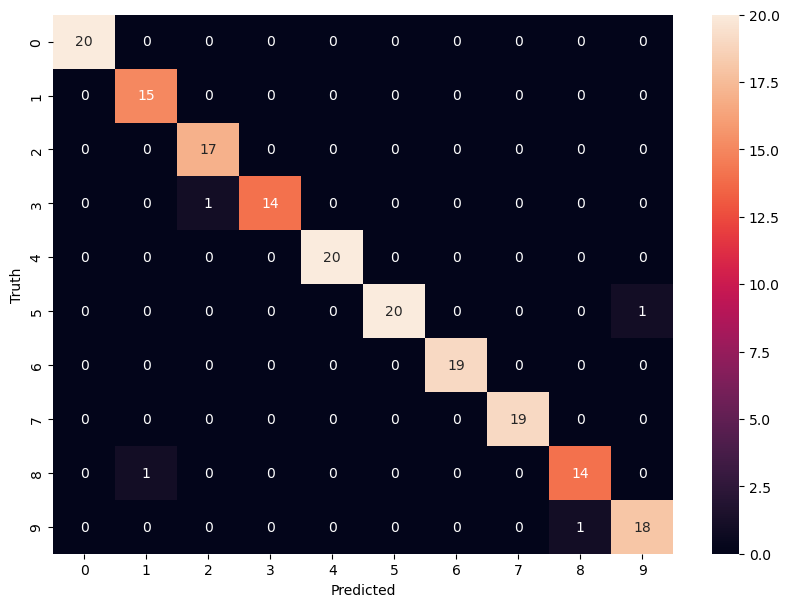

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(C,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [45]:
len(Y_test)

180

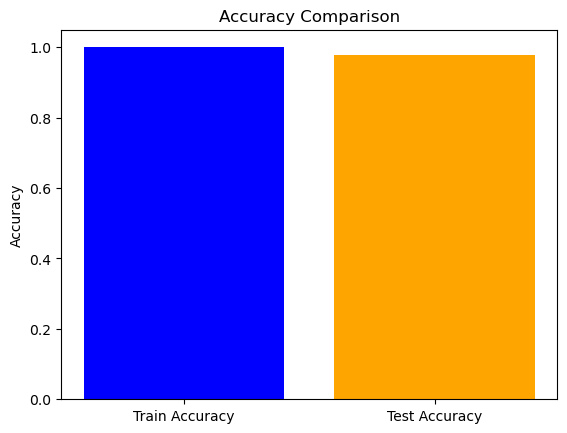

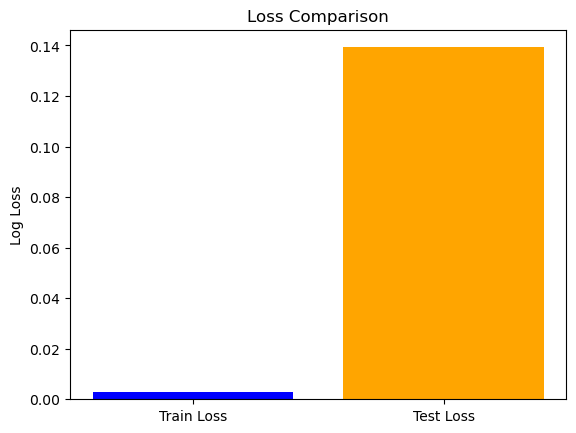

In [57]:
from sklearn.metrics import accuracy_score, log_loss # for accuracy and loss comparison
import matplotlib.pyplot as plt

# Train predictions
train_predictions = reg.predict(X_train)
train_probabilities = reg.predict_proba(X_train)

# Test predictions
test_predictions = reg.predict(X_test)
test_probabilities = reg.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

# Calculate log loss
train_loss = log_loss(Y_train, train_probabilities)
test_loss = log_loss(Y_test, test_probabilities)

# Plot accuracy
plt.figure()
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# Plot loss
plt.figure()
plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'orange'])
plt.ylabel('Log Loss')
plt.title('Loss Comparison')
plt.show()